Link for the tutorial https://lwmachinelearning.wordpress.com/portfolio/customer-churn-analysis/

In [58]:

# Necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display

In [59]:
# Read the file
file = "./WA_Fn-UseC_-Telco-Customer-Churn.csv"
dataset = pd.read_csv(file, na_values=[" "])

In [60]:
# Start looking at the dataset
dataset.shape

(7043, 21)

In [61]:
dataset.head().T #Transposed for easier visualization

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [62]:
dataset['SeniorCitizen']=pd.Categorical(dataset['SeniorCitizen']) #Changing from int to categorical
dataset.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [63]:
del dataset["customerID"] # Deleting the custumerID column

In [64]:
dataset.isnull().sum() # Checking for NA values in the dataset

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [65]:
dataset = dataset.dropna() # Droping few NA rows data

In [66]:
# Spliting the dataset into numeric and objects to facilitate the analysis
numerics = ['float64', 'int64']
numeric_ds = dataset.select_dtypes(include=numerics)
objects_ds = dataset.select_dtypes(exclude=numerics)

In [67]:
numeric_ds.describe() # Describing the numeric_ds dataset

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [68]:
objects_ds.describe().T # Describing the objects_ds dataset

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [69]:
dataset.groupby('Churn').size() # This gives the idea of how our data looks like

Churn
No     5163
Yes    1869
dtype: int64

In [70]:
# Graphical Analysis
# Divided into 3 sections
# 1. Numerical
# 2. Numerical vs. Categotical
# 3. Categorical

[]

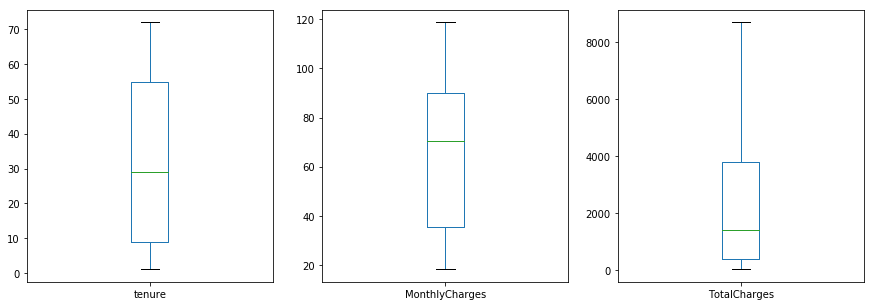

In [71]:
# box plots
numeric_ds.plot(kind='box', subplots=True, figsize=(15,5))
plt.plot()

[]

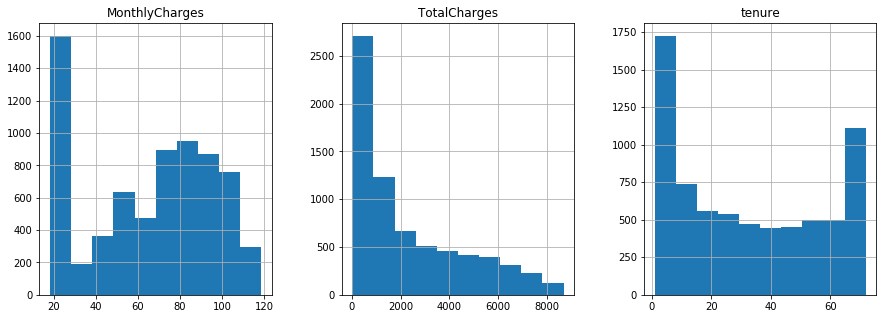

In [72]:
# histogram plots
numeric_ds.hist(layout=(1,3), figsize=(15,5))
plt.plot()

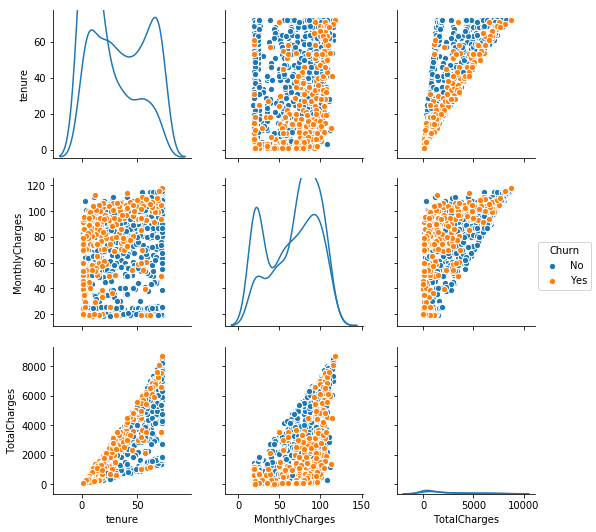

In [73]:
numeric_ds = pd.concat([numeric_ds,dataset["Churn"]],axis=1) #Add the 'Churn' variable to the numeric dataset

g = sns.PairGrid(numeric_ds.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

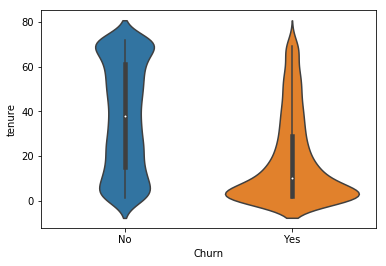

In [74]:
# Violin plot to decide the bins that i'm going to use
sns.violinplot(x="Churn", y="tenure", data=numeric_ds);

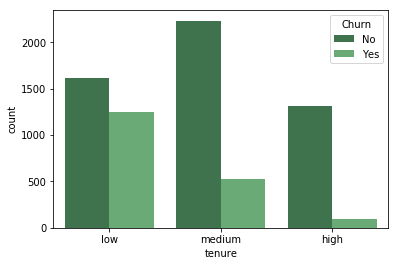

In [75]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

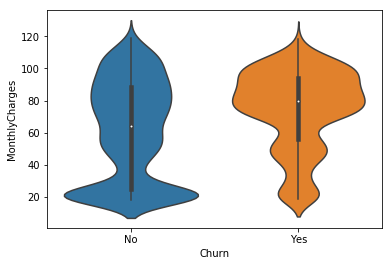

In [76]:
# Violin plot of monthly charges with churn
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_ds);

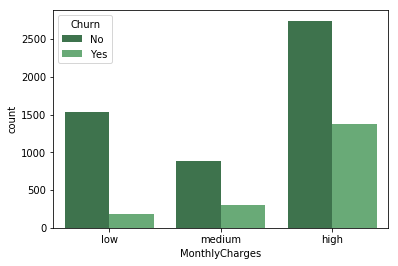

In [77]:
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

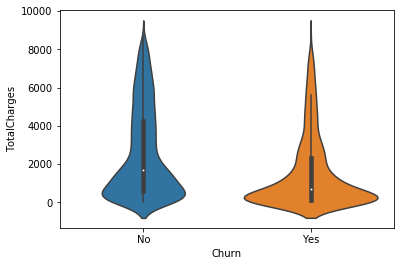

In [78]:
# Violin plot of total charges with churn
sns.violinplot(x="Churn", y="TotalCharges", data=numeric_ds);

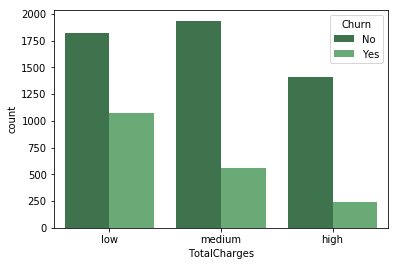

In [79]:
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

In [80]:
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T

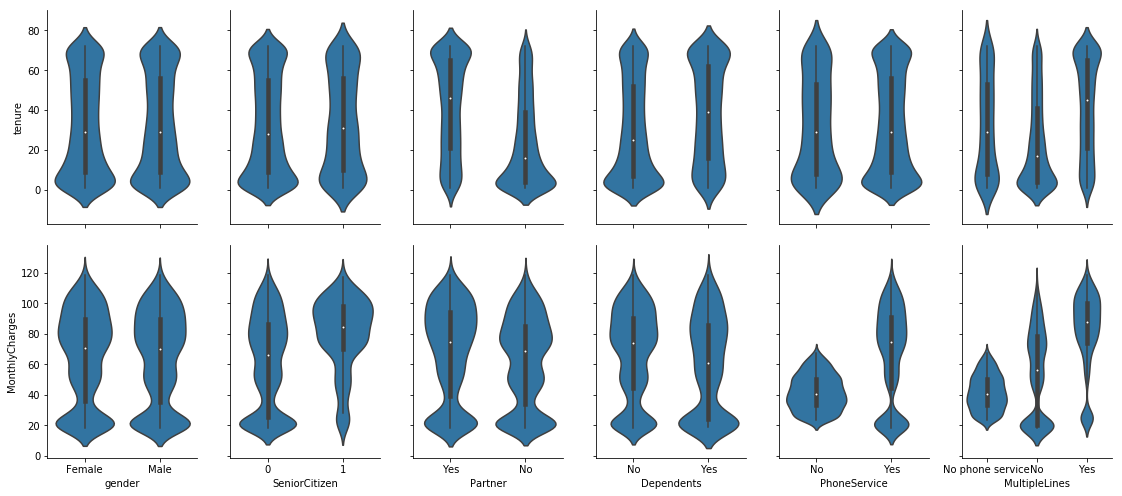

In [81]:
# Numeric vs Categorical Plots

# We will use the PairGrid from the Seaborn library for that, 
# since there was too many variables to plot we will split in 3

g = sns.PairGrid(dataset, x_vars=objects_ds.columns[0:6].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

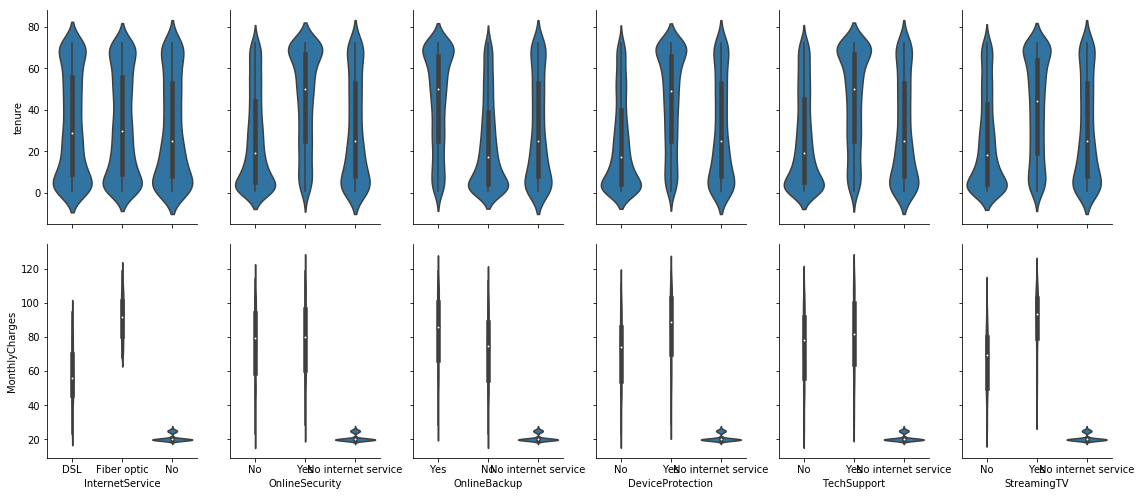

In [82]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[6:12].values,  
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

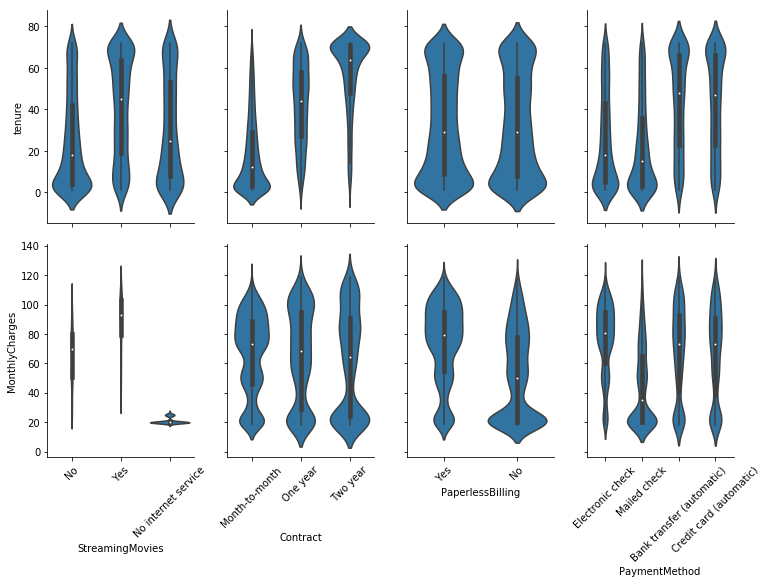

In [83]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[12:16].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
for ax in g.axes.flat:
   for tick in ax.get_xticklabels():
      tick.set_rotation(45)
g.map(sns.violinplot);

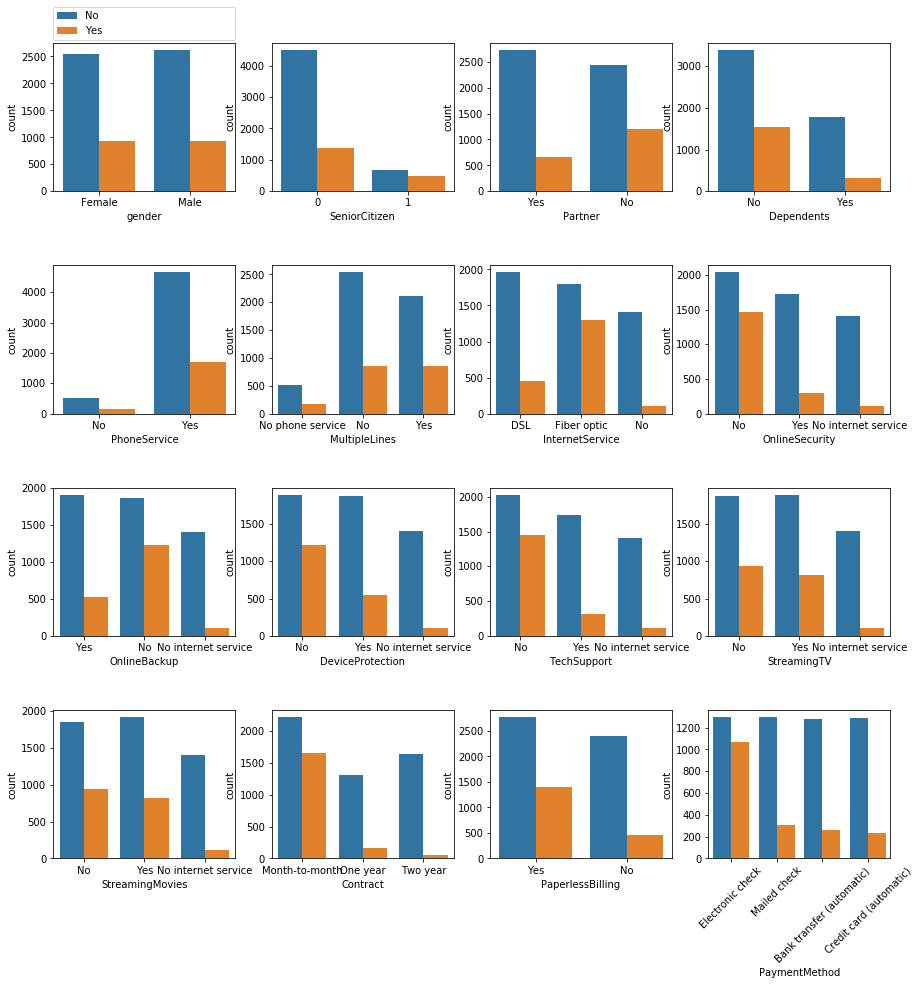

In [84]:
# Count of churn for each attribute value represented in bar chart
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

In [85]:
# Machine Learning Models

# Split Train and Test
data=pd.concat([bins,objects_ds],axis=1)  # Concatenate bins with object variables
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(data) # Transform the categorical variables into binary vectors

In [86]:
# Now the data is ready for spliting

features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features].values
Y = dummy["Churn_Yes"].values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [87]:
# Training Models

# Using Kfold method to compare different models and use the best model to predict the test data

scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.800179 (0.012824)
KNN: 0.765153 (0.010409)
CART: 0.728534 (0.015334)
NB: 0.701870 (0.015433)


[]

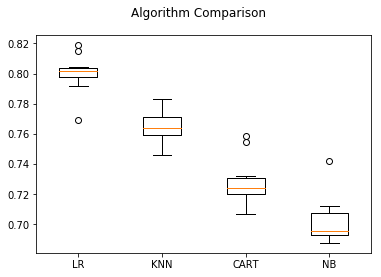

In [88]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.plot()

In [89]:
# Make predictions on validation dataset
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.794598436389
[[918  99]
 [190 200]]
             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1017
          1       0.67      0.51      0.58       390

avg / total       0.78      0.79      0.79      1407



In [90]:
# Coefficients of the model

coefs = np.std(X_train, 0)*model.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = features
df_imp.sort_values("importance", inplace=True, ascending=False)
display(df_imp.head(5))
display(df_imp.tail(5))

,importance,labels
43,0.350954,Contract_Month-to-month
23,0.292869,InternetService_Fiber optic
1,0.237136,tenure_low
7,0.148625,TotalCharges_low
50,0.106498,PaymentMethod_Electronic check


,importance,labels
46,-0.141131,PaperlessBilling_No
3,-0.185951,MonthlyCharges_high
0,-0.235333,tenure_high
22,-0.296474,InternetService_DSL
45,-0.369439,Contract_Two year


Those tables gives us the most important features to predict if the client will leave or not, where the highest 
ones indicate strong chance of leaving and the lower ones indicates high chance of staying, I can plot all the 
variables to make it easier to see:

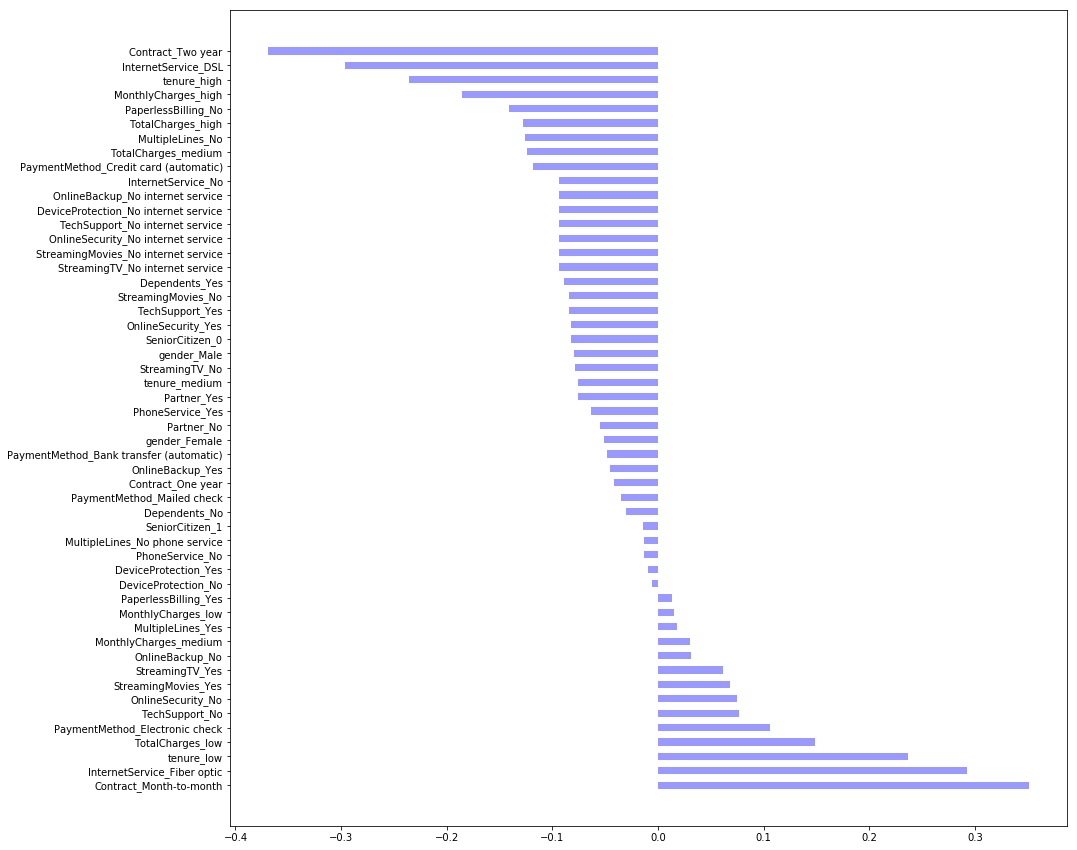

In [91]:
# Ploting all the variables 

index = np.arange(len(df_imp))
fig = plt.figure(figsize=(15,15))
bar_width = 0.5
rects = plt.barh(index , df_imp["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_imp["labels"])
plt.show()

In [92]:
# Probaility estimation

# Defining the funtion that will do kfold probability estimation

from sklearn.cross_validation import KFold
import warnings
warnings.filterwarnings('ignore')

def run_prob_cv(X, y, clf_class, **kwargs):
   kf = KFold(len(y), n_folds=5, shuffle=True)
   y_prob = np.zeros((len(y),2))
   for train_index, test_index in kf:
      X_train, X_test = X[train_index], X[test_index]
      y_train = y[train_index]
      clf = clf_class(**kwargs)
      clf.fit(X_train,y_train)
      y_prob[test_index] = clf.predict_proba(X_test)
   return y_prob

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Now I can use it to predict the probability of churn based on the features and I will group by the predicted probability in bins of 10% so I know how many clients I have in each bin and the average probability of each bin.

In [93]:
pred_prob = run_prob_cv(X, Y, LogisticRegression)
pred_churn = pred_prob[:,1]
is_churn = Y == 1

# Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)

# calculate true probabilities
true_prob = {}
for prob in counts.index:
 true_prob[prob] = np.mean(is_churn[pred_churn == prob])
 true_prob = pd.Series(true_prob)

# pandas-fu
counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts["probability"] = pd.cut(counts["pred_prob"], bins=np.arange(0,1.1,0.1), labels=["%.2f"%number for number in np.arange(0,1,0.1)])
counts.groupby("probability").agg({'count':['sum'],'pred_prob':['mean'],'true_prob': ['mean']})

,count,pred_prob,true_prob
,sum,mean,mean
probability,,,
0.00,2615.0,0.038447,0.041842
0.10,1067.0,0.147457,0.145463
0.20,618.0,0.249428,0.259727
0.30,672.0,0.350509,0.309011
0.40,588.0,0.449063,0.426661
0.50,497.0,0.550446,0.557092
0.60,508.0,0.648042,0.662978
0.70,377.0,0.749668,0.730489


In [94]:
# Filter only the clients with preicted probability higher than 80%
result = pd.DataFrame(X[pred_prob[:,1]>0.8], columns=features)

In [95]:
# Defining a function to return the original columns

def undummy(df):
   x=result.stack()
   stacked=pd.DataFrame(x[x!=0].index.get_level_values(1))
   newdata=stacked.loc[[i for j, i in enumerate(stacked.index) if j % 19 == 0]]
   for col in np.arange(1,19):
      newdata=pd.concat([newdata.reset_index(drop=True),stacked.loc[[i for j, i in enumerate(stacked.index) if j % 19 == col]].reset_index(drop=True)],axis=1)
   newdata.columns = [x.partition('_')[0] for x in newdata.loc[0].values]
   newdata = pd.DataFrame([newdata[x].str.replace('(.*)_','') for x in newdata.columns]).T
   return newdata

In [96]:
# Final result with the same format as the input

final = undummy(result)
final.describe().T

,count,unique,top,freq
tenure,90,1,low,90
MonthlyCharges,90,1,high,90
TotalCharges,90,2,low,89
gender,90,2,Female,45
SeniorCitizen,90,2,1,57
Partner,90,2,No,69
Dependents,90,2,No,86
PhoneService,90,1,Yes,90
MultipleLines,90,2,Yes,71
InternetService,90,1,Fiber optic,90


Conclusion
So with the numerical and categorical plots we were able to start answering the questions that we introduced at the beginning of this project of which variables influences if the client will leave. The logistic regression model helped us to know the most important features to predict if the client will leave and the probabilistic model was the one able to show us the clients with highest chance of leaving.

All these results together give us an important tool when the company wants to decide which clients to focus their resources to try to avoid them leaving so you can leverage your resources in the best way possible.